In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Import data
df = pd.read_csv(r"D:\Project\Project_Streamer\dataset\vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.00,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.00,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.00,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.00,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.shape

(16598, 11)

Dữ liệu gồm 16598 hàng và 11 cột

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Ở cột Year và Publisher ta thấy có dữ liệu bị thiếu. Nhưng ta chỉ loại bỏ giá trị thiếu ở cột Year, vì ta đang phân tích danh số dựa theo năm phát hành để đưa ra nhận xét về năm có doanh thu cao nhất, nên với các giá trị thiếu ở cột Year sẽ khiến dữ liệu không chính xác vì vậy cần loại bỏ đi. Còn với dữ liệu thiếu ở Publisher vẫn dữ được vì nó vẫn chứa dữ liệu doanh thu, nếu bỏ đi doanh thu sẽ không còn chính xác nữa.

In [7]:
df_clean = df.dropna(subset=["Year"]).copy()
df_clean["Year"] = df_clean["Year"].astype(int)
df=df_clean

In [8]:
df.duplicated().sum()

np.int64(0)

Dữ liệu không có duplicate nào

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.00,16327.00,16327.00,16327.00,16327.00,16327.00,16327.00
mean,8292.87,2006.41,0.27,0.15,0.08,0.05,0.54
std,4792.67,5.83,0.82,0.51,0.31,0.19,1.57
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4136.50,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8295.00,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12441.50,2010.00,0.24,0.11,0.04,0.04,0.48
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [10]:
df.nunique()

Rank            16327
Name            11360
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

Dữ liệu gồm 11493 Game, 31 nhà phát hành, và 12 Thể loại trong 39 năm

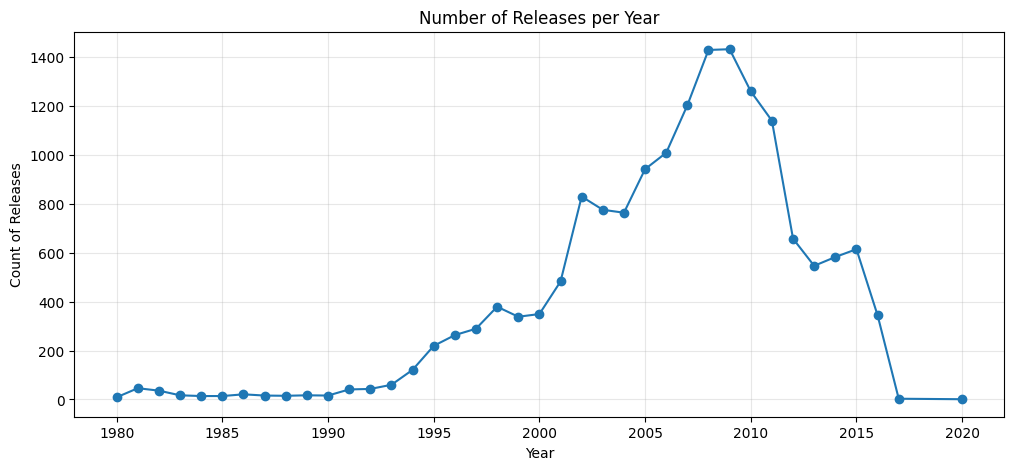

In [11]:
# 1) Nếu muốn count bản phát hành (dòng)
releases_per_year = df_clean.groupby("Year").size().sort_index()
# Vẽ
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count of Releases")
plt.grid(alpha=0.3)
plt.show()


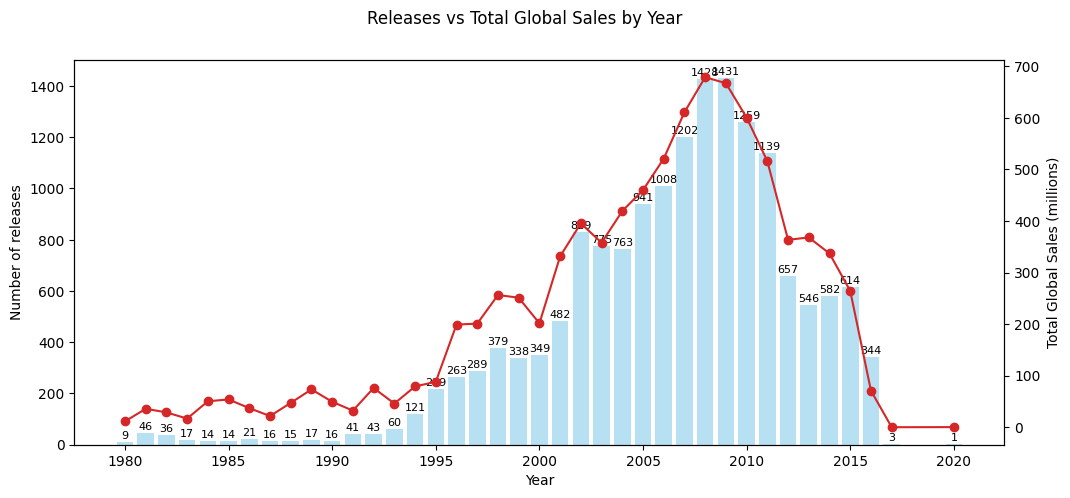

In [21]:
# Tổng doanh thu global theo năm
sales_by_year = df_clean.groupby("Year")["Global_Sales"].sum().sort_index()

# Trung bình doanh thu 1 bản/tựa theo năm
mean_sales_by_year = df_clean.groupby("Year")["Global_Sales"].mean().sort_index()

# Vẽ chung: bar = count, line = total sales (twin axis)
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(releases_per_year.index, releases_per_year.values, alpha=0.6, label="Releases", color='skyblue')
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of releases")
for i in enumerate(releases_per_year.values):
    ax1.text(releases_per_year.index[i[0]], i[1] + 5, str(i[1]), ha='center', va='bottom', fontsize=8  )
ax2 = ax1.twinx()
ax2.plot(sales_by_year.index, sales_by_year.values, color='tab:red', marker='o', label="Total Global Sales")
ax2.set_ylabel("Total Global Sales (millions)")
fig.suptitle("Releases vs Total Global Sales by Year")
ax1.grid(False)
ax2.grid(False)
plt.show()


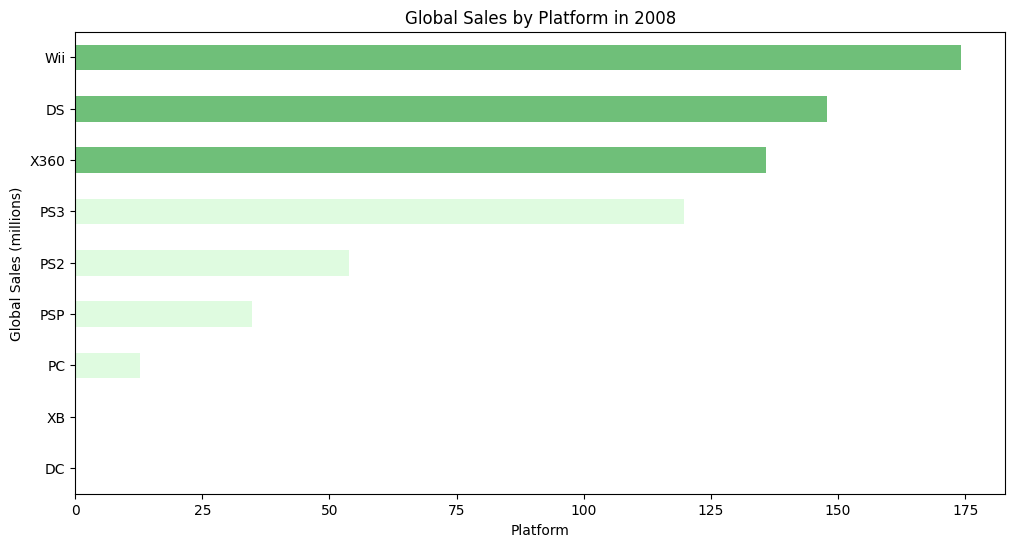

In [13]:
platform_sales = df_clean.groupby(["Year","Platform"])["Global_Sales"].sum().sort_values(ascending=False)
top_platforms_2008 = platform_sales.loc[2008].head(3).index.tolist()
colors = ['#6fbf79' if platform in top_platforms_2008 else '#dffbe0' for platform in platform_sales.loc[2008].index]
platform_sales.loc[2008].plot(kind='barh', figsize=(12,6), color=colors)
plt.title("Global Sales by Platform in 2008")
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.gca().invert_yaxis()
plt.show()


Số bản phát hành game bắt đầu tăng trưởng mạnh từ năm 1995, đạt đỉnh vào năm 2008 với hơn 800 bản phát hành. Tuy nhiên, sau đó số lượng này giảm dần, có thể do sự bão hòa của thị trường game và sự chuyển dịch sang các nền tảng di động và trực tuyến.
Doanh thu toàn cầu cũng tăng theo số lượng phát hành, đạt đỉnh vào năm 2008 (thế hệ của Wii, DS, X360) với hơn 650 triệu USD, sau đó giảm nhẹ nhưng vẫn duy trì ở mức cao trên 10 tỷ USD mỗi năm. Đến sau năm 2012 doanh thu bắt đầu giảm sút đáng kể so với bản phát hành, từ đó số bản phát hành cũng giảm hẳn cùng với doanh thu.

In [14]:
df1 = df.groupby("Name")[df.columns[6:]].sum().sort_values(by="Global_Sales", ascending=False).head(10)
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,
Wii Sports,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
Tetris,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


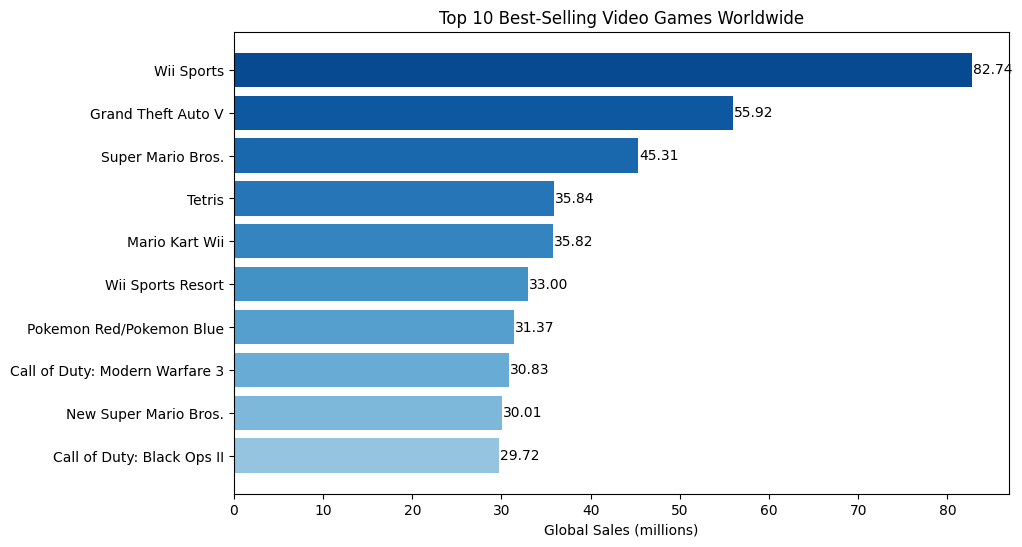

In [15]:
colors = plt.cm.Blues(np.linspace(0.9, 0.4, len(df1)))  

plt.figure(figsize=(10,6))
bars = plt.barh(df1.index, df1["Global_Sales"], color=colors)
for i in enumerate(bars):
    plt.text(i[1].get_width() + 0.1, i[1].get_y() + i[1].get_height()/2, f'{i[1].get_width():.2f}', va='center')
plt.xlabel("Global Sales (millions)")
plt.title("Top 10 Best-Selling Video Games Worldwide")
plt.gca().invert_yaxis()
plt.show()

Với top 10 Game bán chạy nhất trên toàn cầu, ta có top 1 là game Wii Sports vượt trội hơn các game top 2 Grand Theft Auto V top 3 Super Mario Bros. 

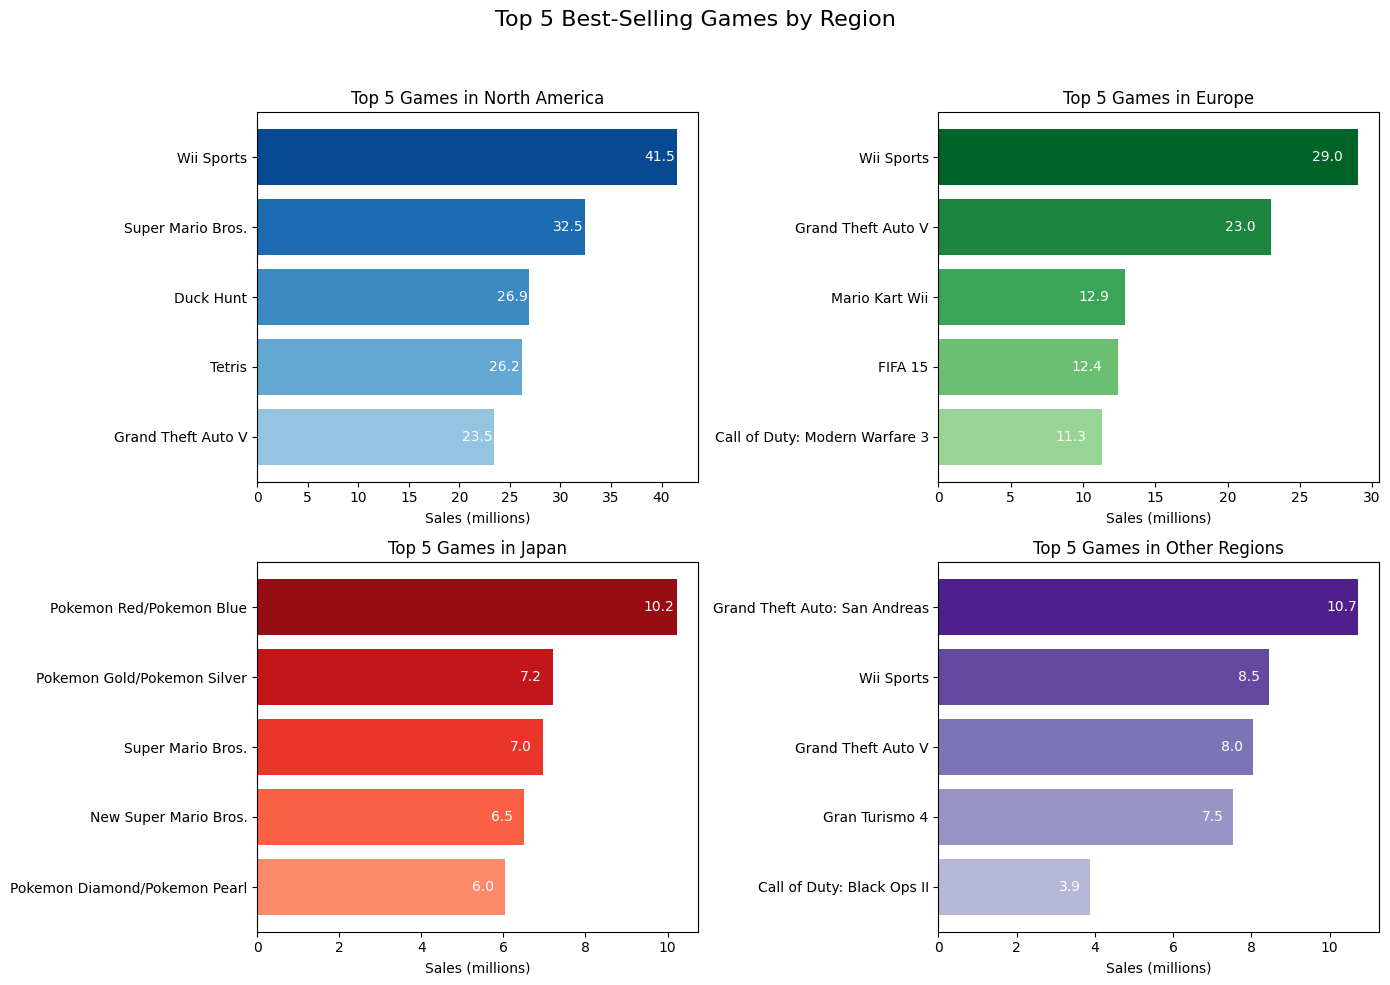

In [16]:
import matplotlib.pyplot as plt
import numpy as np

regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
titles = ["North America", "Europe", "Japan", "Other Regions"]
cmaps = [plt.cm.Blues, plt.cm.Greens, plt.cm.Reds, plt.cm.Purples]  # màu riêng cho từng khu vực

fig, axs = plt.subplots(2, 2, figsize=(14,10))
axs = axs.flatten()

for i, region in enumerate(regions):
    # Lấy top 5 game theo từng khu vực
    top5 = df.groupby("Name")[region].sum().sort_values(ascending=False).head(5)
    
    # Tạo màu giảm dần
    colors = cmaps[i](np.linspace(0.9, 0.4, len(top5)))  
    
    axs[i].barh(top5.index[::-1], top5.values[::-1], color=colors[::-1])  
    axs[i].set_title(f"Top 5 Games in {titles[i]}", fontsize=12)
    axs[i].set_xlabel("Sales (millions)")
    
    # Hiển thị số trên cột
    for j, v in enumerate(top5.values[::-1]):

        if v > 11:
            axs[i].text(v -3.2, j, f"{v:.1f}", va="center", color='white')
        else:
            axs[i].text(v -0.8, j, f"{v:.1f}", va="center", color='white')
        # axs[i].text(v -3.5, j, f"{v:.1f}", va="center")

plt.suptitle("Top 5 Best-Selling Games by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Mặc dù Wii Sports bán được 82.74 triệu bản toàn cầu, trong đó riêng Bắc Mỹ đã chiếm 41.49 triệu (≈50%), nhưng tựa game này lại không lọt top doanh số tại Nhật Bản. Ngược lại, các game bán chạy nhất tại Nhật Bản chủ yếu thuộc dòng Pokémon, ngoại trừ Super Mario Bros. (6.81 triệu tại JP, đứng top 3 toàn cầu). Điều này cho thấy sự khác biệt rõ ràng về thị hiếu giữa các khu vực.

Ngoài ra, với tỷ trọng doanh thu lớn từ Bắc Mỹ, có thể kết luận rằng NA là thị trường trọng điểm, quyết định đáng kể đến thành công toàn cầu của một tựa game.

Text(0.5, 1.0, 'Top 10 Publishers by Global Sales')

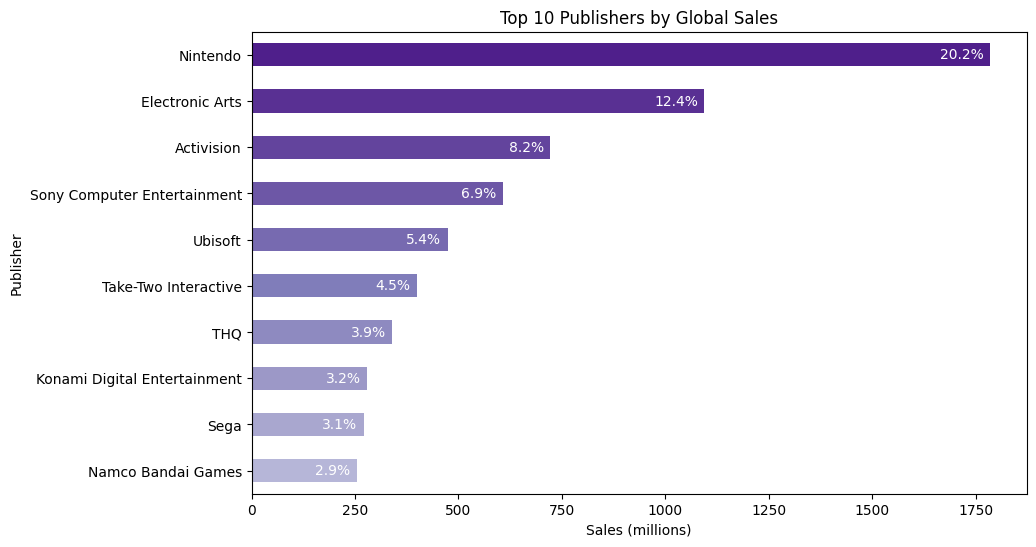

In [17]:
genre_plot = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
colors = cmaps[i](np.linspace(0.9, 0.4, len(genre_plot)))  
genre_plot.plot(kind='barh', figsize=(10,6), color=colors)
    # Hiển thị số trên cột
for j, v in enumerate(genre_plot.values):
    if v > 1000:
        plt.text(v-120, j, f"{v*100/df['Global_Sales'].sum():.1f}%", va="center", color='white')
    else:
        plt.text(v-100, j, f"{v*100/df['Global_Sales'].sum():.1f}%", va="center", color='white')
plt.ylabel("Publisher")
plt.xlabel("Sales (millions)")
plt.gca().invert_yaxis()
plt.title("Top 10 Publishers by Global Sales")

Xét theo doanh thu toàn cầu, Nintendo là nhà phát hành dẫn đầu với hơn 1750 triệu USD, chiếm khoảng 20.2% tổng doanh thu. Theo sau là Electronic Arts với 1100 triệu USD (12.4%) và Activision với 750 triệu USD (8.2%). Có thể thấy Nintendo vượt trội khi doanh thu cao hơn Electronic Arts khoảng 8 điểm % và Activision khoảng 12 điểm %. Điều này cho thấy Nintendo không chỉ là nhà phát hành có doanh thu lớn nhất mà còn là động lực chính định hình thị trường game toàn cầu.

Text(0, 0.5, 'Platforms')

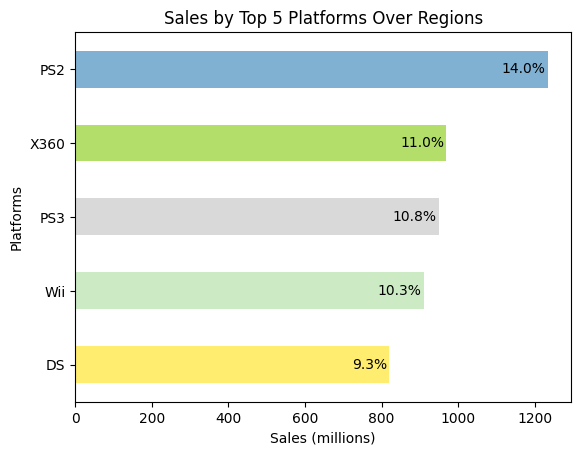

In [18]:
top_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).transpose()
colors = plt.cm.Set3(np.linspace(0.4, 1, len(top_platform)))
top_platform.plot(kind='barh', color = colors)
for j, v in enumerate(top_platform.values):
    if v > 900:
        plt.text(v-120, j, f"{v*100/df['Global_Sales'].sum():.1f}%", va="center", color='black')
    else:
        plt.text(v-95, j, f"{v*100/df['Global_Sales'].sum():.1f}%", va="center", color='black')
plt.gca().invert_yaxis()
plt.title("Sales by Top 5 Platforms Over Regions")
plt.xlabel("Sales (millions)")
plt.ylabel("Platforms")

Xét theo tổng doanh thu toàn cầu, PlayStation 2 (PS2) dẫn đầu với hơn 1200 triệu USD (~14%). Theo sau là Xbox 360 (11.0%) và PlayStation 3 (10.8%), đều đạt gần 1000 triệu USD. Vị trí thứ 4 và 5 lần lượt thuộc về Wii (10.3%) và Nintendo DS (9.3%), với doanh thu hơn 900 triệu USD và 800 triệu USD.

Có thể thấy PS2 vẫn giữ được vị thế nổi bật, nhưng không quá vượt trội so với các hệ máy khác. Thị trường console nhìn chung phân tán, doanh thu game được chia sẻ khá đồng đều giữa các hệ máy, thay vì phụ thuộc hoàn toàn vào một nền tảng duy nhất.

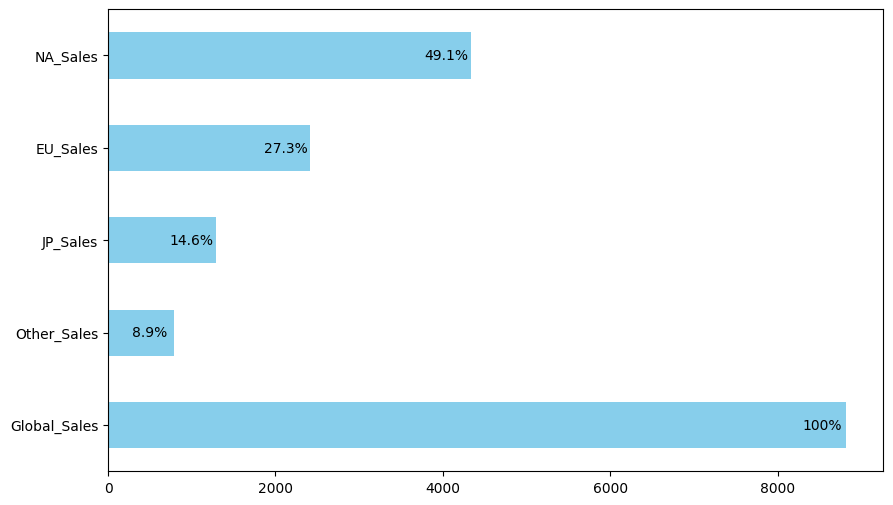

In [19]:
df2 =  df[df.columns[6:]].sum()
df2.plot(kind = 'barh', figsize=(10,6), color='skyblue')
for j, v in enumerate(df2.values):
    if v > 5000:
        plt.text(v-525, j, f"{v*100/df['Global_Sales'].sum():.0f}%", va="center", color='black')
    elif v > 1000:
        plt.text(v-550, j, f"{v*100/df['Global_Sales'].sum():.1f}%", va="center", color='black')
    else:
        plt.text(v-500, j, f"{v*100/df['Global_Sales'].sum():.1f}%", va="center", color='black')
plt.gca().invert_yaxis()

Xét theo doanh thu khu vực, Bắc Mỹ (NA) dẫn đầu với gần 5000 triệu USD (~49.1%), vượt trội so với các khu vực khác. Tiếp theo là Châu Âu (EU) với hơn 2500 triệu USD (27.3%), và Nhật Bản (JP) với khoảng 1200 triệu USD (14.6%). Các khu vực khác chỉ đóng góp gần 900 triệu USD (8.9%).

Có thể thấy, Bắc Mỹ là thị trường trọng điểm, gần như dẫn dắt toàn bộ ngành game toàn cầu. Trong khi đó, EU vẫn nổi bật hơn JP khoảng 12 điểm %, cho thấy sự khác biệt đáng kể giữa hai khu vực lớn này. Tổng thể, ba khu vực NA, EU và JP chiếm ưu thế rõ rệt so với phần còn lại, nhưng thành công tại NA là yếu tố then chốt quyết định vị thế toàn cầu.

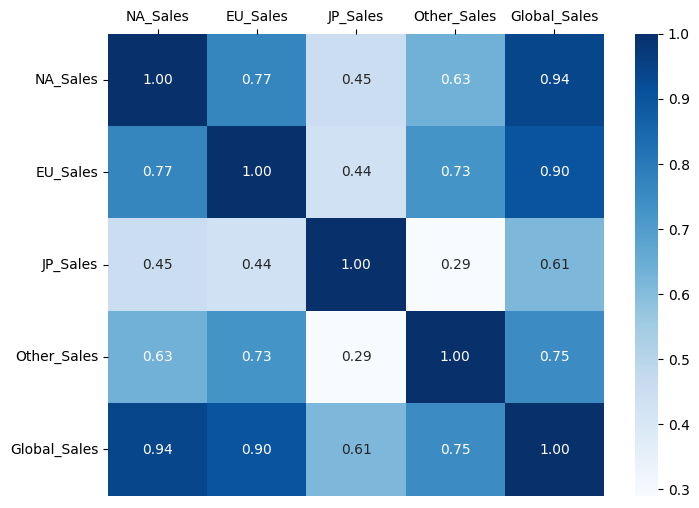

In [20]:
corr_df = df.select_dtypes(include=['float']).corr()
plt.figure(figsize=(8,6))

sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='Blues', xticklabels=True,
    yticklabels=True)
plt.gca().xaxis.tick_top()
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

Dựa vào heatmap thể hiện sự tương quan, ta thấy doanh thu ở Bắc Mỹ và Châu Âu có mức tương quan rất cao với doanh thu toàn cầu (lần lượt 0.94 và 0.90). Điều này cho thấy hai thị trường này đóng vai trò chủ đạo trong việc quyết định xu hướng doanh thu toàn cầu.

Trong khi đó, Nhật Bản chỉ có mức tương quan trung bình (0.61), thấp hơn các khu vực khác (0.75). Điều này phản ánh đặc thù văn hóa và thị hiếu riêng biệt của thị trường Nhật Bản, khiến tác động của khu vực này đến doanh thu toàn cầu hạn chế hơn.

Tóm lại, Bắc Mỹ và Châu Âu là hai thị trường then chốt dẫn dắt doanh thu toàn cầu, còn Nhật Bản đòi hỏi chiến lược phát triển game riêng phù hợp với đặc thù văn hóa.

# Summary
Tổng quan cho thấy thị trường game đã đạt đến một đỉnh điểm rõ rệt vào khoảng năm 2008, trước khi bắt đầu sụt giảm dần sau năm 2012 do sự bão hòa và sự dịch chuyển mô hình kinh doanh sang nền tảng di động và dịch vụ trực tuyến. Trong giai đoạn này, Nintendo nổi bật là nhà phát hành hàng đầu, trong khi PS2 dẫn đầu về nền tảng, dù thị trường console vẫn cho thấy sự cạnh tranh khốc liệt và phân tán (không có một sự thống trị tuyệt đối). Về mặt địa lý, Bắc Mỹ và Châu Âu là hai khu vực định hình xu hướng ngành, với Bắc Mỹ là thị trường trọng điểm, trong khi Nhật Bản duy trì một thị hiếu đặc thù riêng. Điều này khẳng định rằng, ngoài chu kỳ thời gian, khác biệt khu vực và sự thay đổi mô hình kinh doanh là những yếu tố chính quyết định sự biến động doanh thu của ngành